In [2]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

!pip install pandas_datareader

  Using cached pandas_datareader-0.8.1-py2.py3-none-any.whl (107 kB)


In [3]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

/Users/neeraj/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,110.829552
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.065109
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,113.091560
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,113.205620
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,113.813881


In [6]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2016-12-28    105.980774
2016-12-29    106.065491
2016-12-30    106.137399
2017-01-03    106.220102
2017-01-04    106.302231
2017-01-05    106.387605
2017-01-06    106.473041
2017-01-09    106.569687
2017-01-10    106.668987
2017-01-11    106.775693
Name: Adj Close, dtype: float64

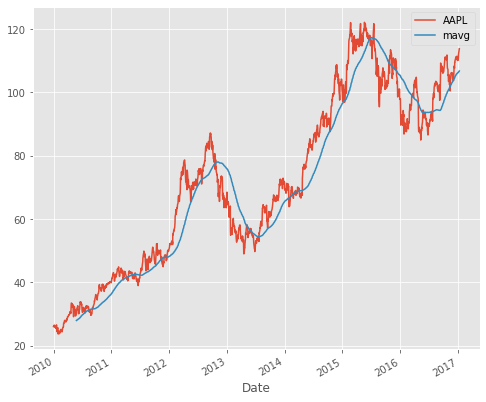

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

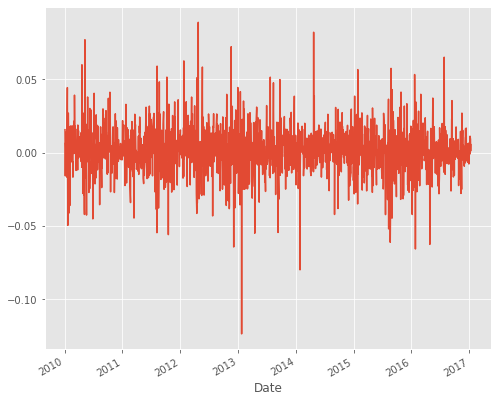

In [8]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [9]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [10]:
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,110.829552,27.926640,794.020020,144.788177,58.705212
2017-01-06,112.065109,28.006382,806.150024,145.500534,59.214054
2017-01-09,113.091560,27.873482,806.650024,143.886993,59.025597
2017-01-10,113.205620,27.793737,804.789978,142.058899,59.006744
2017-01-11,113.813881,27.882341,807.909973,143.972809,59.543854


In [11]:
# Correlation Analysis
retscomp = dfcomp.pct_change()

In [12]:
retscomp

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005151,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
...,...,...,...,...,...
2017-01-05,0.005085,-0.005678,0.009048,-0.003308,0.000000
2017-01-06,0.011148,0.002855,0.015277,0.004920,0.008668
2017-01-09,0.009159,-0.004745,0.000620,-0.011090,-0.003183


In [13]:
corr = retscomp.corr()

In [14]:
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381925,0.411879,0.384135,0.393774
GE,0.381925,1.000000,0.422535,0.535507,0.474491
GOOG,0.411879,0.422535,1.000000,0.403215,0.472263
IBM,0.384135,0.535507,0.403215,1.000000,0.496950
MSFT,0.393774,0.474491,0.472263,0.496950,1.000000


Text(0, 0.5, 'Returns GE')

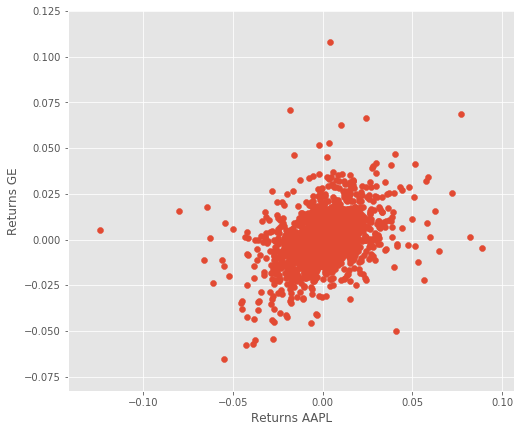

In [16]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel("Returns AAPL")
plt.ylabel("Returns GE")

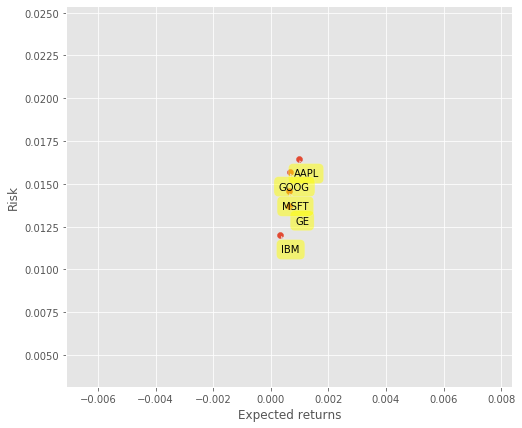

In [17]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))